# Introduction

This lab demonstrates two approaches for feature selection: model-based and sequential feature selection. The goal is to select the most important features from a given dataset. We use the Diabetes dataset, consisting of 10 features collected from 442 diabetes patients.

# Loading the Data

We load the Diabetes dataset from scikit-learn and print its description.

In [4]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# Feature Importance from Coefficients

To get an idea of the importance of the features, we use the RidgeCV estimator. The features with the highest absolute **coef_** value are considered the most important.

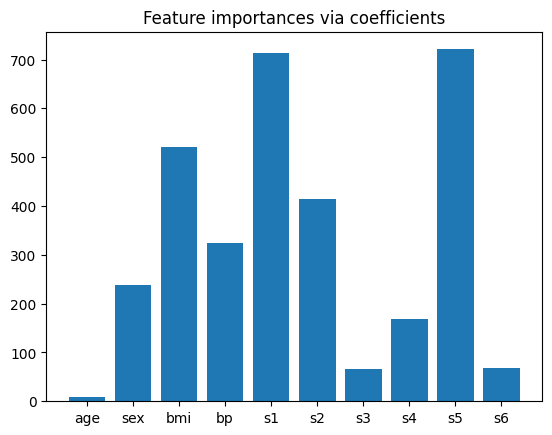

In [5]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height=importance, x=feature_names)
plt.title('Feature importances via coefficients')
plt.show()

# Selecting Features Based on Importance

We select the two features which are the most important according to the coefficients using **SelectFromModel**. **SelectFromModel** accepts a **threshold** parameter and will select the features whose importance (defined by the coefficients) are above this threshold.

In [6]:
from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-3] + 0.01

sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

Features selected by SelectFromModel: ['s1' 's5']


# Selecting Features with Sequential Feature Selection

We use Sequential Feature Selector (SFS) to select features. SFS is a greedy procedure where, at each iteration, we choose the best new feature to add to our selected features based on a cross-validation score. We can also go in the reverse direction (backward SFS), i.e. start with all the features and greedily choose features to remove one by one.

In [7]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction="forward").fit(X, y)
sfs_backward = SequentialFeatureSelector(ridge, n_features_to_select=2, direction="backward").fit(X, y)

print(f"Features selected by forward sequential selection: {feature_names[sfs_forward.get_support()]}")
print(f"Features selected by backward sequential selection: {feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['bmi' 's5']
Features selected by backward sequential selection: ['bmi' 's5']


# Summary

This lab demonstrated two approaches to feature selection: model-based and sequential feature selection. We used RidgeCV estimator to get the importance of features and SelectFromModel to select features based on importance. Sequential Feature Selector is a greedy procedure where, at each iteration, we choose the best new feature to add to our selected features based on a cross-validation score.